In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px

In [2]:
ball=pd.read_csv(r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\Deployedment\IPL-Second-Innings-Prediction-Score\NoteBook\DataSets\IPL_Ball_by_Ball_2008_2022.csv")
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [3]:
match=pd.read_csv(r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\Deployedment\IPL-Second-Innings-Prediction-Score\NoteBook\DataSets\IPL_Matches_2008_2022.csv")
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
total_score = ball.groupby(['ID', 'innings']).sum()['total_run'].reset_index()

C:\Users\PRANAY\AppData\Local\Temp\ipykernel_3084\625588996.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [5]:
total_score

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [15]:
import pandas as pd

# Calculate first innings and second innings total scores
total_score = ball.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
First_Innings_total_score = total_score[total_score['innings'] == 1]
Second_Innings_Total_score = total_score[total_score['innings'] == 2]

# Merge first innings total score with match dataframe
match_df = match.merge(First_Innings_total_score[['ID', 'total_run',]], on='ID')

# Rename the column to 'First_Innings_total_score'
match_df = match_df.rename(columns={'total_run': 'First_Innings_total_score'})

# Merge second innings total score with match dataframe
match_df = match_df.merge(Second_Innings_Total_score[['ID', 'total_run']], on='ID')

# Rename the column to 'Second_Innings_Total_score'
match_df = match_df.rename(columns={'total_run': 'Second_Innings_Total_score'})

match_df.head()


C:\Users\PRANAY\AppData\Local\Temp\ipykernel_3084\630940905.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,First_Innings_total_score,Second_Innings_Total_score
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130,133
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157,161
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207,193
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188,191
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157,160


In [145]:
First_Innings_total_score

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [146]:
Second_Innings_Total_score

,ID,innings,total_run
1,335982,2,82
3,335983,2,207
5,335984,2,132
7,335985,2,166
9,335986,2,112
...,...,...,...
1919,1304116,2,160
1921,1312197,2,191
1923,1312198,2,193
1925,1312199,2,161


## lets convert overs and ballnumber into overs(0.1) format

In [16]:
overs = ball['overs']
ballnumber = ball['ballnumber']
ball['Overs'] = overs + ballnumber/10
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Overs
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.1
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.2
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.3
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.4
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.5


In [17]:
ball.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'Overs'],
      dtype='object')

In [18]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'First_Innings_total_score',
       'Second_Innings_Total_score'],
      dtype='object')

In [19]:
fig = px.histogram(match_df, x='WinningTeam')
fig.show()

# Merge the match_df dataset with ball dataset

In [20]:
ball_df= match_df.merge(ball, on='ID')

In [21]:
ball_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Overs
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.1
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.2
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,0.3
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.4
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,0.5


In [22]:
ball_df['BattingTeam'].value_counts()

Mumbai Indians                 27826
Royal Challengers Bangalore    26384
Kolkata Knight Riders          26192
Chennai Super Kings            25128
Rajasthan Royals               22777
Kings XI Punjab                22646
Delhi Daredevils               18723
Sunrisers Hyderabad            18196
Deccan Chargers                 9034
Delhi Capitals                  7587
Pune Warriors                   5443
Gujarat Lions                   3566
Punjab Kings                    3388
Gujarat Titans                  1971
Rising Pune Supergiant          1900
Lucknow Super Giants            1840
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: BattingTeam, dtype: int64

In [23]:
fig = px.bar(ball_df['BattingTeam'].value_counts())
fig.show()

In [24]:
ball_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'First_Innings_total_score',
       'Second_Innings_Total_score', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'extra_type', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'player_out', 'kind', 'fielders_involved', 'BattingTeam', 'Overs'],
      dtype='object')

In [81]:
ball_df = ball_df[ball_df['innings']==2]

In [82]:
ball_df.shape

(19267, 47)

In [83]:
ball_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,BattingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
153,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.1,25,108,89,8,4.838710,7.280899,1,Rajasthan Royals
154,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.2,25,108,88,8,4.687500,7.363636,1,Rajasthan Royals
155,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.3,26,107,87,8,4.727273,7.379310,1,Rajasthan Royals
156,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.4,26,107,86,8,4.588235,7.465116,1,Rajasthan Royals
157,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.5,27,106,85,8,4.628571,7.482353,1,Rajasthan Royals


# Create new row current_score after each ball

In [84]:
ball_df['current_score'] = ball_df.groupby('ID')['total_run'].cumsum()

In [85]:
ball_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,BattingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
153,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.1,0,108,89,8,4.838710,7.280899,1,Rajasthan Royals
154,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.2,0,108,88,8,4.687500,7.363636,1,Rajasthan Royals
155,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.3,1,107,87,8,4.727273,7.379310,1,Rajasthan Royals
156,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.4,1,107,86,8,4.588235,7.465116,1,Rajasthan Royals
157,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.5,2,106,85,8,4.628571,7.482353,1,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225758,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,Royal Challengers Bangalore,14.5,56,2,31,1,5.393258,0.387097,0,Kolkata Knight Riders
225759,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,Royal Challengers Bangalore,14.6,57,1,30,1,5.400000,0.200000,0,Kolkata Knight Riders
225760,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,Royal Challengers Bangalore,14.7,57,1,29,1,5.340659,0.206897,0,Kolkata Knight Riders
225761,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,Royal Challengers Bangalore,15.1,58,0,29,1,5.406593,0.000000,0,Kolkata Knight Riders


In [30]:
ball_df['runs_left'] = np.where(ball_df['Second_Innings_Total_score']-ball_df['current_score']>=0, ball_df['Second_Innings_Total_score']-ball_df['current_score'], 0)

In [98]:
df1=ball_df[['TossWinner','TossDecision','BattingTeam','BowlingTeam']]
df1.to_csv("data1.csv",index=False)

In [97]:
ball_df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,BowlingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BattingTeam
153,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.1,0,108,89,8,4.83871,7.280899,1,Rajasthan Royals
154,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.2,0,108,88,8,4.68750,7.363636,1,Rajasthan Royals


In [99]:
ball_df['ball_left'] = np.where(120 - ball_df['overs']*6 - ball_df['ballnumber']>=0,120 - ball_df['overs']*6 - ball_df['ballnumber'], 0)

In [100]:
ball_df['wickets_left'] = 10 - ball_df.groupby('ID')['isWicketDelivery'].cumsum()

In [101]:
ball_df['current_run_rate'] = (ball_df['current_score']*6)/(120-ball_df['ball_left'])

In [102]:
ball_df['required_run_rate'] = np.where(ball_df['ball_left']>0, ball_df['runs_left']*6/ball_df['ball_left'], 0)

In [103]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [104]:
ball_df['result'] = ball_df.apply(result, axis=1)

In [105]:
ball_df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,BowlingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BattingTeam
153,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.1,0,108,89,10,0.0,7.280899,0,Rajasthan Royals
154,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.2,0,108,88,10,0.0,7.363636,0,Rajasthan Royals


In [106]:
index1 = ball_df[ball_df['Team2']==ball_df['BattingTeam']]['Team1'].index
index2 = ball_df[ball_df['Team1']==ball_df['BattingTeam']]['Team2'].index

In [107]:
ball_df.loc[index1, 'BowlingTeam'] = ball_df.loc[index1, 'Team1']
ball_df.loc[index2, 'BowlingTeam'] = ball_df.loc[index2, 'Team2']

In [108]:
ball_df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,BowlingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BattingTeam
153,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.1,0,108,89,10,0.0,7.280899,0,Rajasthan Royals
154,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.2,0,108,88,10,0.0,7.363636,0,Rajasthan Royals


In [109]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Sunrisers Hyderabad','Lucknow Super Giants','Gujarat Titans']

current_venues = ['M Chinnaswamy Stadium','Eden Gardens, Kolkata', 'MA Chidambaram Stadium, Chepauk', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium','Punjab Cricket Association IS Bindra Stadium',
       'Rajiv Gandhi International Stadium, Uppal','Dr DY Patil Sports Academy, Mumbai','Arun Jaitley Stadium','Narendra Modi Stadium, Ahmedabad']
ball_df = ball_df[(ball_df['BattingTeam'].isin(current_teams)) &(ball_df['BowlingTeam'].isin(current_teams))]
ball_df = ball_df[(ball_df['Venue'].isin(current_venues))]

# Removing the first 5 overs data in every match
ball_df = ball_df[ball_df['Overs']>=5.0]

In [110]:
ball_df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,BowlingTeam,Overs,current_score,runs_left,ball_left,wickets_left,current_run_rate,required_run_rate,result,BattingTeam
153,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.1,0,108,89,10,0.0,7.280899,0,Rajasthan Royals
154,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,5.2,0,108,88,10,0.0,7.363636,0,Rajasthan Royals


In [111]:
ball_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'First_Innings_total_score',
       'Second_Innings_Total_score', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'extra_type', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'player_out', 'kind', 'fielders_involved', 'BowlingTeam', 'Overs',
       'current_score', 'runs_left', 'ball_left', 'wickets_left',
       'current_run_rate', 'required_run_rate', 'result', 'BattingTeam'],
      dtype='object')

In [112]:
df = ball_df[['TossWinner','TossDecision','BattingTeam', 'BowlingTeam','batter','non-striker','bowler','First_Innings_total_score','Venue','Overs','current_score','wickets_left','current_run_rate','required_run_rate','Second_Innings_Total_score']]

In [113]:
df.head(2)

,TossWinner,TossDecision,BattingTeam,BowlingTeam,batter,non-striker,bowler,First_Innings_total_score,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate,Second_Innings_Total_score
153,Rajasthan Royals,bat,Rajasthan Royals,Gujarat Titans,Shubman Gill,HH Pandya,YS Chahal,130,"Narendra Modi Stadium, Ahmedabad",5.1,0,10,0.0,7.280899,133
154,Rajasthan Royals,bat,Rajasthan Royals,Gujarat Titans,Shubman Gill,HH Pandya,YS Chahal,130,"Narendra Modi Stadium, Ahmedabad",5.2,0,10,0.0,7.363636,133


In [114]:
fig = px.bar(df['BowlingTeam'].value_counts())
fig.show()

In [115]:
fig = px.bar(df['BattingTeam'].value_counts())
fig.show()

In [116]:
fig = px.bar(df['Venue'].value_counts())
fig.show()

In [117]:
df.describe()

,First_Innings_total_score,Overs,current_score,wickets_left,current_run_rate,required_run_rate,Second_Innings_Total_score
count,19267.000000,19267.000000,19267.000000,19267.000000,19267.000000,19267.000000,19267.000000
mean,168.368921,11.902990,55.887061,7.981004,4.109130,7.914548,156.084341
std,27.816793,4.155258,36.268119,1.934743,1.796858,3.292233,26.307704
min,67.000000,5.100000,0.000000,0.000000,0.000000,0.000000,48.000000
25%,151.000000,8.300000,26.000000,7.000000,2.913025,6.114296,140.000000
50%,166.000000,11.600000,52.000000,8.000000,4.252427,8.000000,159.000000
75%,187.000000,15.400000,82.000000,10.000000,5.372093,9.545455,171.000000
max,246.000000,19.800000,176.000000,10.000000,9.136364,60.000000,223.000000


In [118]:
df.isna().sum()

TossWinner                    0
TossDecision                  0
BattingTeam                   0
BowlingTeam                   0
batter                        0
non-striker                   0
bowler                        0
First_Innings_total_score     0
Venue                         0
Overs                         0
current_score                 0
wickets_left                  0
current_run_rate              0
required_run_rate             0
Second_Innings_Total_score    0
dtype: int64

In [119]:
df.sample(df.shape[0])

,TossWinner,TossDecision,BattingTeam,BowlingTeam,batter,non-striker,bowler,First_Innings_total_score,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate,Second_Innings_Total_score
72923,Chennai Super Kings,field,Kings XI Punjab,Chennai Super Kings,MS Dhoni,DJ Bravo,MM Sharma,197,Punjab Cricket Association IS Bindra Stadium,19.3,137,7,7.025641,20.000000,193
141010,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,Rajasthan Royals,SR Watson,STR Binny,I Sharma,144,Sawai Mansingh Stadium,14.2,76,9,5.302326,8.647059,146
170635,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,AB de Villiers,M Kaif,Iqbal Abdulla,89,M Chinnaswamy Stadium,8.6,27,8,3.000000,1.818182,105
108122,Kings XI Punjab,field,Royal Challengers Bangalore,Kings XI Punjab,Anureet Singh,AR Patel,MA Starc,226,M Chinnaswamy Stadium,8.4,20,6,2.307692,3.441176,88
146769,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,AB de Villiers,CH Gayle,PJ Sangwan,154,M Chinnaswamy Stadium,10.2,60,9,5.806452,7.965517,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125065,Royal Challengers Bangalore,field,Mumbai Indians,Royal Challengers Bangalore,RR Rossouw,HV Patel,SL Malinga,187,Wankhede Stadium,16.5,90,4,5.346535,7.894737,168
225034,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,MV Boucher,JH Kallis,A Nehra,165,Wankhede Stadium,13.7,70,7,4.941176,10.114286,166
184110,Chennai Super Kings,bat,Chennai Super Kings,Kolkata Knight Riders,YK Pathan,JH Kallis,SB Jakati,153,"MA Chidambaram Stadium, Chepauk",10.2,38,9,3.677419,7.137931,151
15932,Mumbai Indians,field,Rajasthan Royals,Mumbai Indians,Ishan Kishan,Tilak Varma,TA Boult,193,"Dr DY Patil Sports Academy, Mumbai",12.4,74,10,5.842105,6.954545,170


In [120]:
column_mapping = {'non-striker': 'non_striker'}
df = df.rename(columns=column_mapping)

In [121]:
print("Categories in 'Batting Team' variable:     ",end=" " )
print(df['BattingTeam'].unique())

print("Categories in 'Bowling Team' variable:  ",end=" ")
print(df['BowlingTeam'].unique())

print("Categories in'Venue' variable:",end=" " )
print(df['Venue'].unique())

print("Columns Present in Datasets:",end=" ")
print(df.columns)

Categories in 'Batting Team' variable:      ['Rajasthan Royals' 'Royal Challengers Bangalore' 'Lucknow Super Giants'
 'Kolkata Knight Riders' 'Chennai Super Kings' 'Gujarat Titans'
 'Mumbai Indians' 'Delhi Capitals' 'Kings XI Punjab' 'Sunrisers Hyderabad']
Categories in 'Bowling Team' variable:   ['Gujarat Titans' 'Rajasthan Royals' 'Lucknow Super Giants'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Mumbai Indians'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Kings XI Punjab']
Categories in'Venue' variable: ['Narendra Modi Stadium, Ahmedabad' 'Eden Gardens, Kolkata'
 'Dr DY Patil Sports Academy, Mumbai'
 'Punjab Cricket Association IS Bindra Stadium' 'Wankhede Stadium'
 'Arun Jaitley Stadium' 'Sawai Mansingh Stadium' 'M Chinnaswamy Stadium'
 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk']
Columns Present in Datasets: Index(['TossWinner', 'TossDecision', 'BattingTeam', 'BowlingTeam', 'batter',
       'non_striker', 'bowler', 

In [122]:
df.to_csv('IPL-Final-Datasets.csv', index=False)

In [123]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [124]:
df['BowlingTeam']=lc.fit_transform(df['BowlingTeam'])
df['BattingTeam']=lc.fit_transform(df['BattingTeam'])
df['TossDecision']=lc.fit_transform(df['TossDecision'])
df['TossWinner']=lc.fit_transform(df['TossWinner'])
df['batter']=lc.fit_transform(df['batter'])
df['non_striker']=lc.fit_transform(df['non_striker'])
df['bowler']=lc.fit_transform(df['bowler'])
df['Venue']=lc.fit_transform(df['Venue'])

In [125]:
df.head()

,TossWinner,TossDecision,BattingTeam,BowlingTeam,batter,non_striker,bowler,First_Innings_total_score,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate,Second_Innings_Total_score
153,7,0,7,2,304,105,255,130,5,5.1,0,10,0.000000,7.280899,133
154,7,0,7,2,304,105,255,130,5,5.2,0,10,0.000000,7.363636,133
155,7,0,7,2,304,105,255,130,5,5.3,1,10,0.181818,7.379310,133
156,7,0,7,2,104,297,255,130,5,5.4,1,10,0.176471,7.465116,133
157,7,0,7,2,104,297,255,130,5,5.5,2,10,0.342857,7.482353,133


## Model Building

In [126]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [127]:
df.head(2)

,TossWinner,TossDecision,BattingTeam,BowlingTeam,batter,non_striker,bowler,First_Innings_total_score,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate,Second_Innings_Total_score
153,7,0,7,2,304,105,255,130,5,5.1,0,10,0.0,7.280899,133
154,7,0,7,2,304,105,255,130,5,5.2,0,10,0.0,7.363636,133


In [128]:
X = df.drop(columns=['Second_Innings_Total_score'],axis=1)

In [129]:
X.head()

,TossWinner,TossDecision,BattingTeam,BowlingTeam,batter,non_striker,bowler,First_Innings_total_score,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate
153,7,0,7,2,304,105,255,130,5,5.1,0,10,0.000000,7.280899
154,7,0,7,2,304,105,255,130,5,5.2,0,10,0.000000,7.363636
155,7,0,7,2,304,105,255,130,5,5.3,1,10,0.181818,7.379310
156,7,0,7,2,104,297,255,130,5,5.4,1,10,0.176471,7.465116
157,7,0,7,2,104,297,255,130,5,5.5,2,10,0.342857,7.482353


In [130]:
y = df['Second_Innings_Total_score']

In [131]:
y.head()

153    133
154    133
155    133
156    133
157    133
Name: Second_Innings_Total_score, dtype: int64

In [132]:
y.shape

(19267,)

In [133]:
X.shape

(19267, 14)

In [134]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((15413, 14), (3854, 14))

In [135]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,TossWinner,TossDecision,BattingTeam,BowlingTeam,batter,non_striker,bowler,First_Innings_total_score,Venue,Overs,current_score,wickets_left,current_run_rate,required_run_rate
0,-1.701775,0.748556,-0.747049,-1.692815,0.344171,-0.614593,0.837002,-1.167816,-0.576423,0.798308,0.585736,-1.026428,0.510228,-0.777595
1,-1.701775,-1.335905,-1.755391,-0.348385,-0.591869,-0.879650,1.180057,-1.059892,-0.576423,-0.118995,-0.187671,1.044771,0.051778,-0.217657
2,-1.027158,0.748556,0.597408,-1.020600,-0.807050,-1.166794,0.579711,0.702872,-1.275377,-0.094856,0.143789,0.009171,0.584535,0.682708
3,-0.689849,-1.335905,-0.747049,1.332153,0.258099,-1.409763,0.165187,-1.635488,0.472008,0.894867,0.447628,-0.508628,0.219149,-0.126504
4,0.659386,-1.335905,0.597408,0.996046,-1.775367,0.379368,-0.549511,-0.160522,0.821485,-1.615649,-1.513511,1.044771,-2.186804,-0.582268


## Create an Evaluate Function to give all metrics after model Training

In [136]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [137]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 14.4760
- Mean Absolute Error: 10.6550
- R2 Score: 0.6959
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.5034
- Mean Absolute Error: 10.7622
- R2 Score: 0.7013


Lasso
Model performance for Training set
- Root Mean Squared Error: 14.5465
- Mean Absolute Error: 10.6733
- R2 Score: 0.6929
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.5800
- Mean Absolute Error: 10.7711
- R2 Score: 0.6981


Ridge
Model performance for Training set
- Root Mean Squared Error: 14.4760
- Mean Absolute Error: 10.6550
- R2 Score: 0.6959
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.5034
- Mean Absolute Error: 10.7621
- R2 Score: 0.7013


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8.9987
- Mean Absolute Error: 4.2798
- R2 Score: 0.8825
-----------

## Results

In [138]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.997635
7,CatBoosting Regressor,0.996474
6,XGBRegressor,0.993889
4,Decision Tree,0.993353
8,AdaBoost Regressor,0.786605
3,K-Neighbors Regressor,0.772908
2,Ridge,0.701309
0,Linear Regression,0.701308
1,Lasso,0.698147


In [139]:
cat_model = CatBoostRegressor()
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.063076
0:	learn: 25.0930861	total: 44.1ms	remaining: 44s
1:	learn: 24.0643481	total: 66.2ms	remaining: 33s
2:	learn: 23.1013816	total: 83.4ms	remaining: 27.7s
3:	learn: 22.1732009	total: 98.5ms	remaining: 24.5s
4:	learn: 21.3226469	total: 115ms	remaining: 22.8s
5:	learn: 20.5272114	total: 130ms	remaining: 21.5s
6:	learn: 19.7476863	total: 145ms	remaining: 20.6s
7:	learn: 19.0328887	total: 161ms	remaining: 20s
8:	learn: 18.3590102	total: 175ms	remaining: 19.3s
9:	learn: 17.7443528	total: 275ms	remaining: 27.2s
10:	learn: 17.1389148	total: 330ms	remaining: 29.7s
11:	learn: 16.5913034	total: 410ms	remaining: 33.7s
12:	learn: 16.0776222	total: 478ms	remaining: 36.3s
13:	learn: 15.6353045	total: 504ms	remaining: 35.5s
14:	learn: 15.2338063	total: 544ms	remaining: 35.7s
15:	learn: 14.8489379	total: 569ms	remaining: 35s
16:	learn: 14.4771245	total: 609ms	remaining: 35.2s
17:	learn: 14.1110741	total: 636ms	remaining: 34.7s
18:	learn: 13.7948902	total: 655ms	remaining: 33

## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

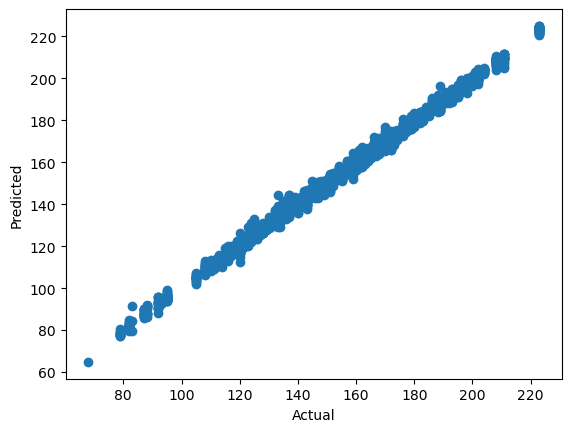

In [140]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

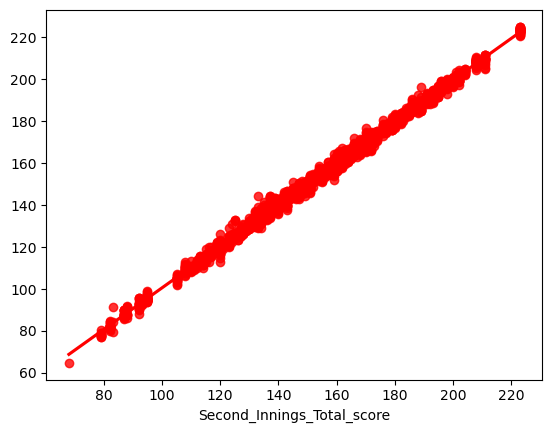

In [141]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Difference between Actual and Predicted Values

In [142]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
184081,151,152.906062,-1.906062
98039,178,177.084593,0.915407
224508,168,165.999475,2.000525
81016,161,162.953601,-1.953601
146783,158,157.609175,0.390825
...,...,...,...
111585,137,137.758487,-0.758487
55562,198,193.077044,4.922956
53127,128,126.389319,1.610681
78654,159,157.804888,1.195112


## Lets Load our Pickle Model

In [143]:
import pickle
pickle.dump(cat_model , open('model.pkl','wb'))

In [144]:
pl = cat_model.predict([1,  2, 1,1, 4,6,7,8,150,55,5,7.6,6.8,12])
pl

140.57801467259173